In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix 
from sklearn.metrics import roc_curve, auc, plot_precision_recall_curve 

In [2]:
# Load the data
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
# Split the dataset into training set and test set (80, 20).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [4]:
def model_evaluation(clf):
    # (1). The accuracy of your model on the test data
    accuracy = clf.score(X_test, y_test)
    print("1. accuracy of the model on the test data: " + str(accuracy) + "\n")
    
    # (2). The precision and recall values
    y_pred = clf.predict(X_test)
    # precision value
    precisions = precision_score(y_test, y_pred, average=None)
    print('2. \n1) precision values: ' + str(precisions))
    # recall value
    recalls = recall_score(y_test, y_pred, average=None)
    print('2) recall values: ' + str(recalls))
    
    # (3). A classification report (scikit-learn has a function that can create this for you)
    target_names = list(data.target_names)
    class_report = classification_report(y_test, y_pred, target_names=target_names)
    print('\n3. classification report\n' + class_report)
    
    # (4). The confusion matrix for this experiment
    print('\n4. confusion matrix')
    print(confusion_matrix(y_test, y_pred))
    
    # (5). An ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('5. Receiver operating characteristic (ROC curve)')
    plt.legend(loc="lower right")
    plt.show()
    
     # (6). A Precision/Recall curve
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('6. 2-class Precision-Recall curve')

# Use scikit-learn’s DecisionTreeClassifier to train a supervised learning model

1. accuracy of the model on the test data: 0.9298245614035088

2. 
1) precision values: [0.95238095 0.91666667]
2) recall values: [0.86956522 0.97058824]

3. classification report
              precision    recall  f1-score   support

   malignant       0.95      0.87      0.91        46
      benign       0.92      0.97      0.94        68

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114


4. confusion matrix
[[40  6]
 [ 2 66]]


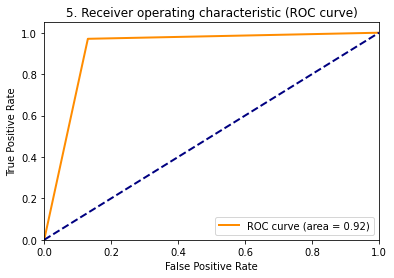

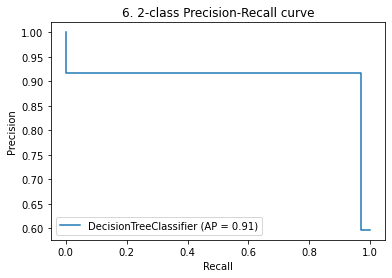

In [5]:
from sklearn import tree
clf0 = tree.DecisionTreeClassifier()
clf0 = clf0.fit(X_train, y_train)
model_evaluation(clf0)

# Train another Decision Tree Classifier - but in this case set the maximum depth of the tree to 1 (max_depth= 1). 

1. accuracy of the model on the test data: 0.8859649122807017

2. 
1) precision values: [1.         0.83950617]
2) recall values: [0.7173913 1.       ]

3. classification report
              precision    recall  f1-score   support

   malignant       1.00      0.72      0.84        46
      benign       0.84      1.00      0.91        68

    accuracy                           0.89       114
   macro avg       0.92      0.86      0.87       114
weighted avg       0.90      0.89      0.88       114


4. confusion matrix
[[33 13]
 [ 0 68]]


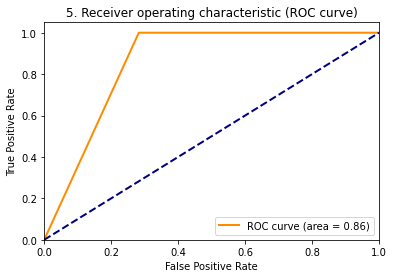

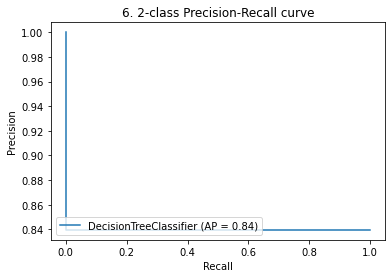

In [6]:
clf1 = tree.DecisionTreeClassifier(max_depth=1)
clf1 = clf1.fit(X_train, y_train)
model_evaluation(clf1)